# Kecerdasan Buatan - UAS
**Nama: Hermanus Rangga Horo**  
**Nim : 71220826**  
**Grup : A**  

Kasus : Deteksi Kecurangan Asursansi

### Visualisasi Data  
Sebelum cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('Asuransi.csv')
# print(df.head(5))
total_baris,total_kolom=df.shape  #TOTAL DATA (baris,kolom) SBLM CLEAN
print(f"Total Baris/Kasus pada Data : {total_baris}")
print(f"Total Kolom pada Data : {total_kolom}")

Total Baris/Kasus pada Data : 1000
Total Kolom pada Data : 69


In [3]:
df.head(10)

,Unnamed: 0,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,witnesses,total_claim_amount,fraud_reported,insured_sex_FEMALE,insured_sex_MALE,...,months_as_customer_groups_301-350,months_as_customer_groups_351-400,months_as_customer_groups_401-450,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low
0,0,53300,0,5,1,2,71610,1,0,1,...,1,0,0,0,0,0,0,1,0,0
1,1,0,0,8,1,0,5070,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,2,35100,0,7,3,3,34650,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,3,48900,-62400,5,1,2,63400,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,4,66000,-46000,20,1,1,6500,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,5,0,0,19,3,2,64100,1,1,0,...,0,0,0,0,0,0,0,1,0,0
6,6,0,-77000,0,3,0,78650,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,7,0,0,23,3,2,51590,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8,8,0,0,21,1,1,27700,0,1,0,...,0,0,0,0,0,0,0,1,0,0
9,9,0,-39300,14,1,1,42300,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 69 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Unnamed: 0                              1000 non-null   int64
 1   capital-gains                           1000 non-null   int64
 2   capital-loss                            1000 non-null   int64
 3   incident_hour_of_the_day                1000 non-null   int64
 4   number_of_vehicles_involved             1000 non-null   int64
 5   witnesses                               1000 non-null   int64
 6   total_claim_amount                      1000 non-null   int64
 7   fraud_reported                          1000 non-null   int64
 8   insured_sex_FEMALE                      1000 non-null   int64
 9   insured_sex_MALE                        1000 non-null   int64
 10  insured_occupation_adm-clerical         1000 non-null   int64
 11  insured_occupation

Unnamed: 0                                int64
capital-gains                             int64
capital-loss                              int64
incident_hour_of_the_day                  int64
number_of_vehicles_involved               int64
                                          ...  
policy_annual_premium_groups_high         int64
policy_annual_premium_groups_low          int64
policy_annual_premium_groups_medium       int64
policy_annual_premium_groups_very high    int64
policy_annual_premium_groups_very low     int64
Length: 69, dtype: object

### Akusisi Data dan Pembersihan  
Menganti Kolom 31 collision_type_? dengan nama kolom yang lebih jelas.    
- collision_type_? = collision_type_other  

In [8]:
df = df.rename(columns={
    'collision_type_?': 'collision_type_other'
})

Memeriksa value data apa saja yang ada di di setiap kolom, untuk memastikan sudah sesuai dengan tipe data yang di pakai.  
Note : Untuk lebih detailnya buka file `detail_value.txt`

In [ ]:
with open('detail_value.txt', 'w') as f:
    for col in df.columns:
        if col != "Unnamed: 0": #Skip Baris NO
            f.write(f"Detail Kolom : '{col}':\n")
            df[col].value_counts()
            f.write(df[col].value_counts().to_string())
            f.write("\n\n")

<b>Memeriksa Data yang kosong</b>  
Menghitung data yang dari tiap kolom dan baris yang tidak terisi.  
Note : Untuk lebih detailnua buka file `data_tidak_valid.txt`  
*Dari hasil yang di tunjukan, data tidak ada yang kosong*

In [ ]:
tidak_valid=df.isnull().sum()
print(tidak_valid)
with open('data_tidak_valid.txt', 'w') as f: #Menyimpan data dalam txt, agar bisa dilihat semua
    f.write(tidak_valid.to_string())

Menghapus Kolom yang tidak diperlukan.  
Selanjutnya kita menghapus kolom yang tidak di perlukan, dalam hal ini data yang tidak memiliki korelasi dengan model yang akan ditrain.  

### Kolom yang dihapus ###
- Unnamed: 0 (kolom penomoran tidak di butuhkan)
#### Kolom-kolom hobi tidak diperlukan
- insured_hobbies_chess
- insured_hobbies_cross-fit
- insured_hobbies_other

In [21]:
hapus = ["Unnamed: 0", "insured_hobbies_chess", "insured_hobbies_crossb-fit", "insured_hobbies_other"]
df = df.drop(columns=hapus) # Menghapus data dengan kolom-kolom diatas.

df.to_csv('Clean_Data.csv', index=False) #menyimpan data yang sudah di bersihkan

In [48]:
df=pd.read_csv('Clean_Data.csv')
# df.info()
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 65 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   capital-gains                           1000 non-null   int64
 1   capital-loss                            1000 non-null   int64
 2   incident_hour_of_the_day                1000 non-null   int64
 3   number_of_vehicles_involved             1000 non-null   int64
 4   witnesses                               1000 non-null   int64
 5   total_claim_amount                      1000 non-null   int64
 6   fraud_reported                          1000 non-null   int64
 7   insured_sex_FEMALE                      1000 non-null   int64
 8   insured_sex_MALE                        1000 non-null   int64
 9   insured_occupation_adm-clerical         1000 non-null   int64
 10  insured_occupation_armed-forces         1000 non-null   int64
 11  insured_occupation

capital-gains                             int64
capital-loss                              int64
incident_hour_of_the_day                  int64
number_of_vehicles_involved               int64
witnesses                                 int64
                                          ...  
policy_annual_premium_groups_high         int64
policy_annual_premium_groups_low          int64
policy_annual_premium_groups_medium       int64
policy_annual_premium_groups_very high    int64
policy_annual_premium_groups_very low     int64
Length: 65, dtype: object

# Visualisasi Data Setelah Cleaning
## Kecurangan yang Dilaporkan

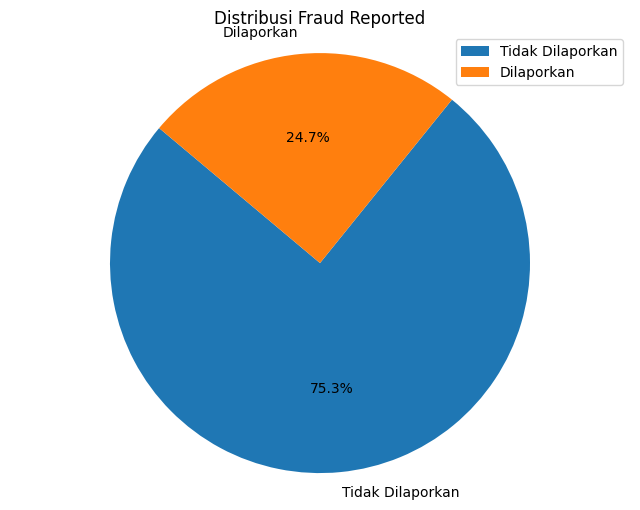

In [26]:
kecurangan=df['fraud_reported'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(kecurangan, labels=['Tidak Dilaporkan', 'Dilaporkan'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Fraud Reported')
plt.axis('equal')
plt.legend(['Tidak Dilaporkan', 'Dilaporkan'], loc="best")
plt.show()

## Jumlah Klaim Berdasakan Insiden

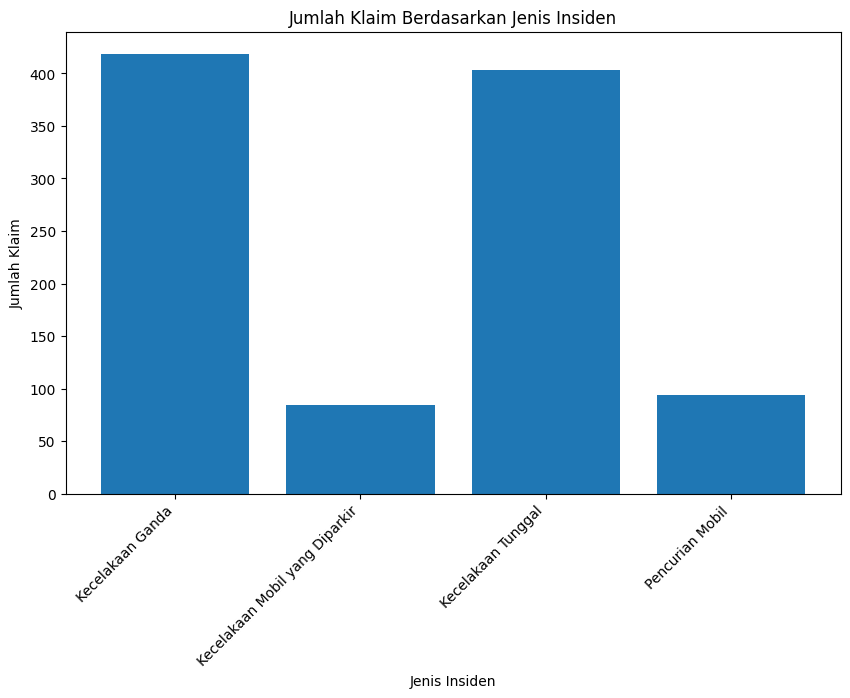

In [34]:
insiden = ['incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
                  'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft']
insiden_count = [df[col].sum() for col in insiden]
insiden=["Kecelakaan Ganda","Kecelakaan Mobil yang Diparkir","Kecelakaan Tunggal","Pencurian Mobil"] 
plt.figure(figsize=(10, 6))
plt.bar(insiden, insiden_count)
plt.title('Jumlah Klaim Berdasarkan Jenis Insiden')
plt.xlabel('Jenis Insiden')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()


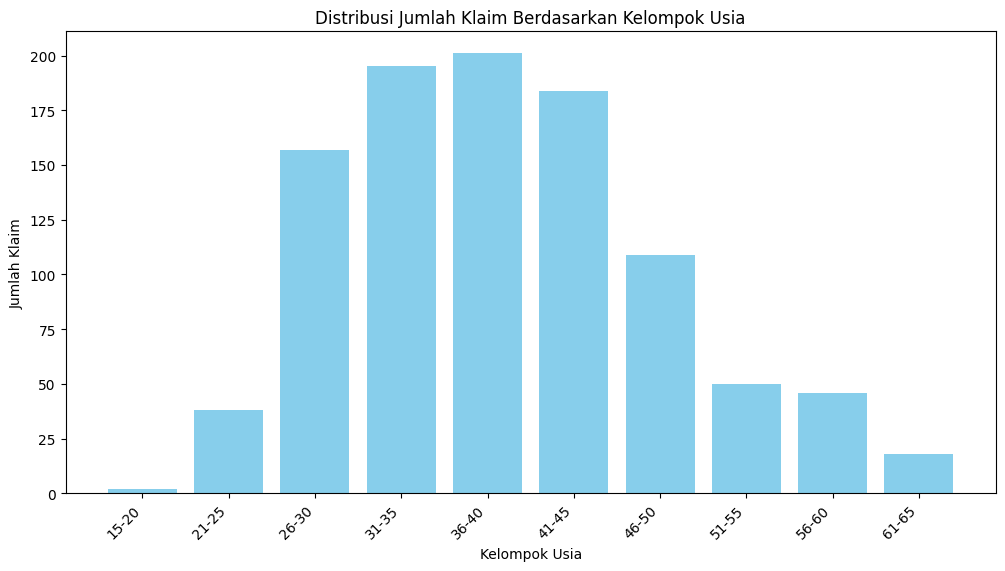

In [36]:
age_groups = ['age_group_15-20', 'age_group_21-25', 'age_group_26-30', 'age_group_31-35', 
              'age_group_36-40', 'age_group_41-45', 'age_group_46-50', 'age_group_51-55', 
              'age_group_56-60', 'age_group_61-65']
age_counts = [df[col].sum() for col in age_groups]
age_groups = ['15-20', '21-25', '26-30', '31-35', 
              '36-40', '41-45', '46-50', '51-55', 
              '56-60', '61-65']

plt.figure(figsize=(12, 6))
plt.bar(age_groups, age_counts, color='skyblue')
plt.title('Distribusi Jumlah Klaim Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()

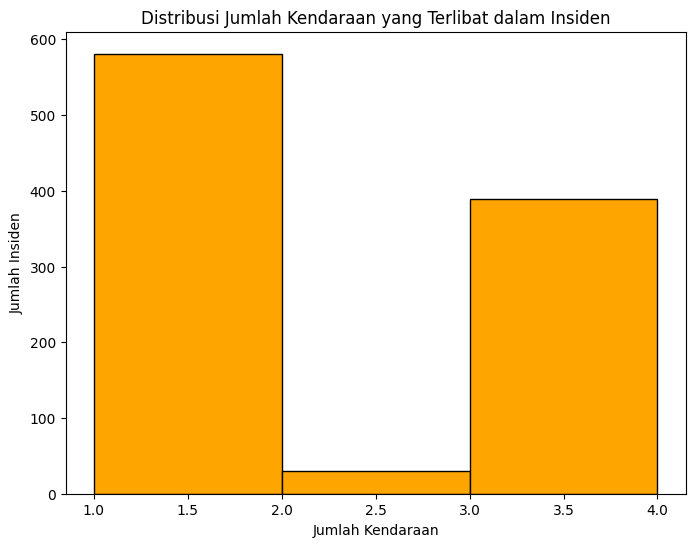

In [37]:
plt.figure(figsize=(8, 6))
plt.hist(df['number_of_vehicles_involved'], bins=range(1, df['number_of_vehicles_involved'].max() + 1), color='orange', edgecolor='black')
plt.title('Distribusi Jumlah Kendaraan yang Terlibat dalam Insiden')
plt.xlabel('Jumlah Kendaraan')
plt.ylabel('Jumlah Insiden')
plt.show()

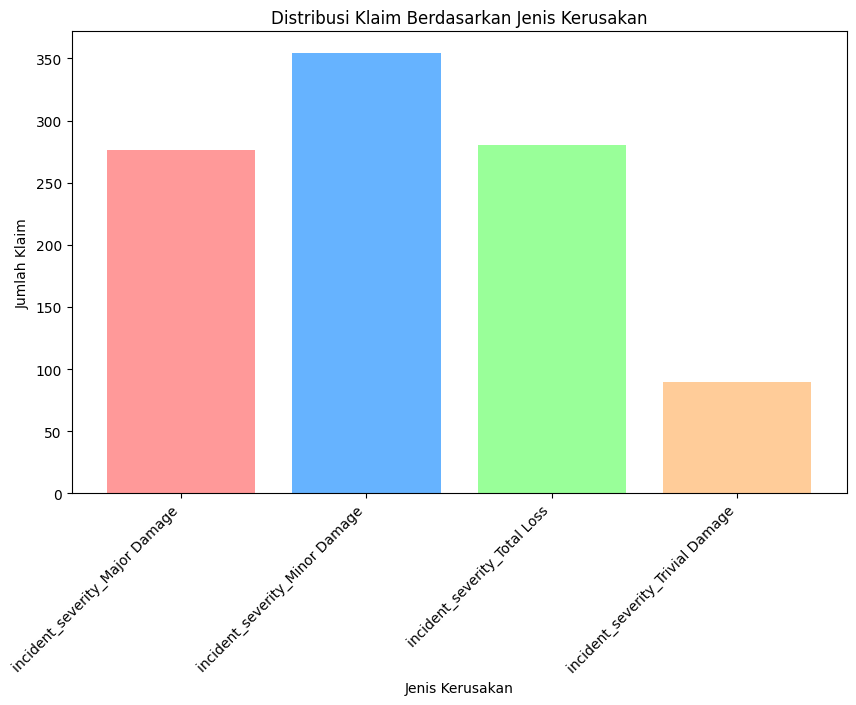

In [39]:
severity_types = ['incident_severity_Major Damage', 'incident_severity_Minor Damage', 
                  'incident_severity_Total Loss', 'incident_severity_Trivial Damage']
severity_counts = [df[col].sum() for col in severity_types]

plt.figure(figsize=(10, 6))
plt.bar(severity_types, severity_counts, color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribusi Klaim Berdasarkan Jenis Kerusakan')
plt.xlabel('Jenis Kerusakan')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()


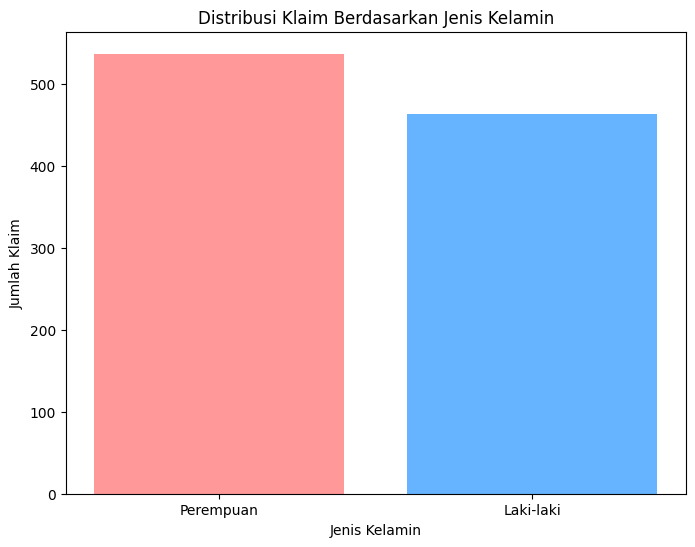

In [40]:
sex_counts = [df['insured_sex_FEMALE'].sum(), df['insured_sex_MALE'].sum()]

plt.figure(figsize=(8, 6))
plt.bar(['Perempuan', 'Laki-laki'], sex_counts, color=['#ff9999','#66b3ff'])
plt.title('Distribusi Klaim Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Klaim')
plt.show()


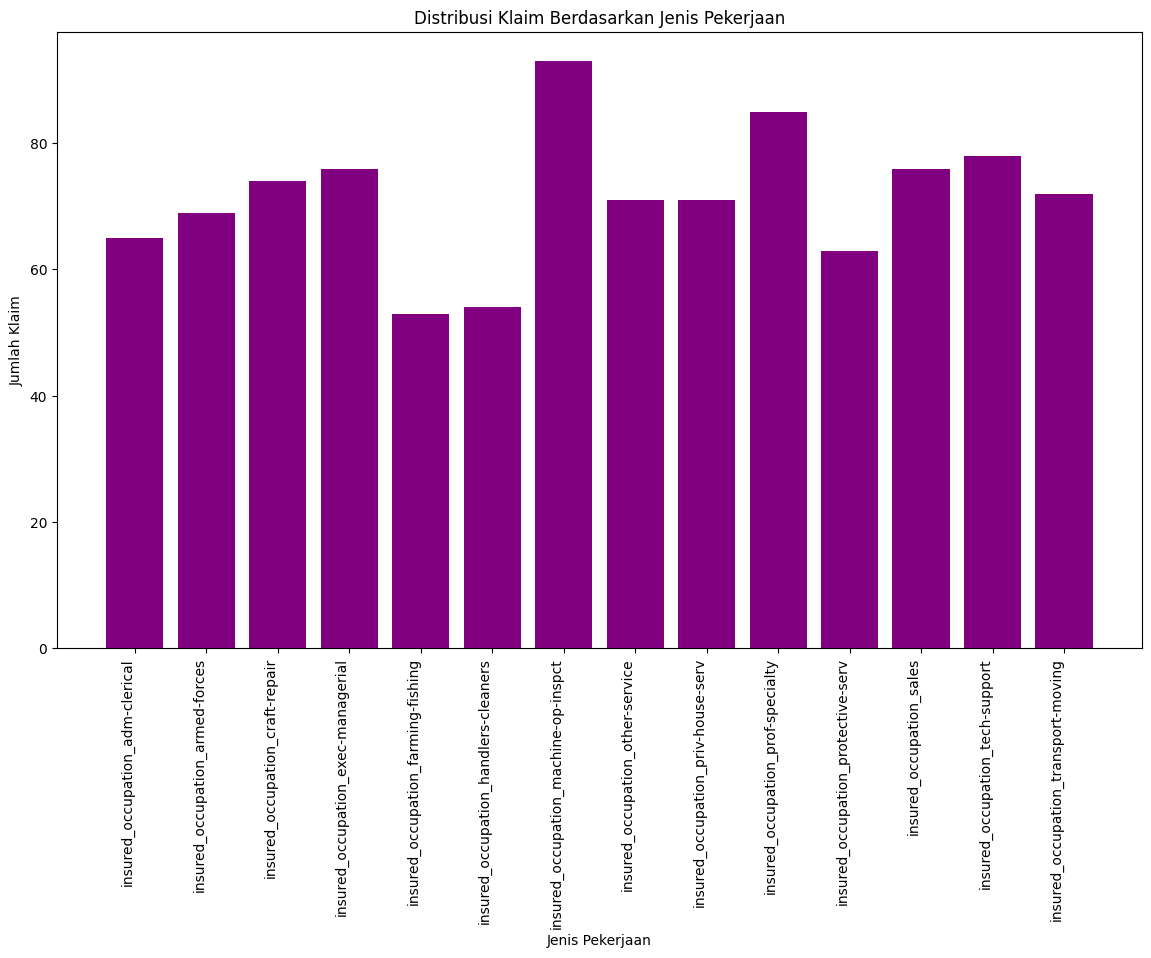

In [41]:
occupation_columns = [col for col in df.columns if col.startswith('insured_occupation')]
occupation_counts = [df[col].sum() for col in occupation_columns]

plt.figure(figsize=(14, 8))
plt.bar(occupation_columns, occupation_counts, color='purple')
plt.title('Distribusi Klaim Berdasarkan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=90, ha='right')
plt.show()


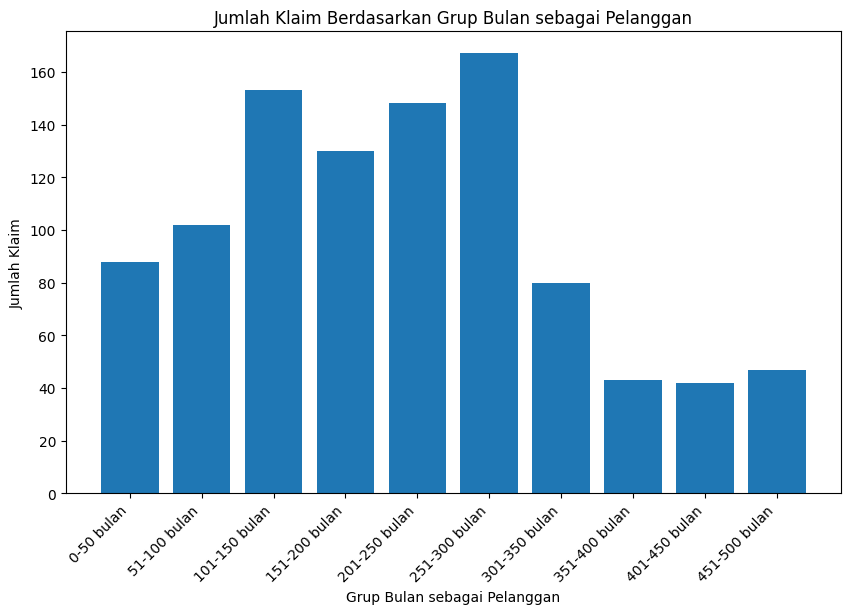

In [49]:
# Memperoleh jumlah klaim untuk setiap grup bulan sebagai pelanggan
bulan_labels = [
    '0-50 bulan', '51-100 bulan', '101-150 bulan', '151-200 bulan',
    '201-250 bulan', '251-300 bulan', '301-350 bulan', '351-400 bulan',
    '401-450 bulan', '451-500 bulan'
]

# Memperoleh jumlah klaim untuk setiap grup bulan sebagai pelanggan
bulan_count = [
    df['months_as_customer_groups_0-50'].sum(),
    df['months_as_customer_groups_51-100'].sum(),
    df['months_as_customer_groups_101-150'].sum(),
    df['months_as_customer_groups_151-200'].sum(),
    df['months_as_customer_groups_201-250'].sum(),
    df['months_as_customer_groups_251-300'].sum(),
    df['months_as_customer_groups_301-350'].sum(),
    df['months_as_customer_groups_351-400'].sum(),
    df['months_as_customer_groups_401-450'].sum(),
    df['months_as_customer_groups_451-500'].sum()
]

# Membuat grafik batang
plt.figure(figsize=(10, 6))
plt.bar(bulan_labels, bulan_count)
plt.title('Jumlah Klaim Berdasarkan Grup Bulan sebagai Pelanggan')
plt.xlabel('Grup Bulan sebagai Pelanggan')
plt.ylabel('Jumlah Klaim')
plt.xticks(rotation=45, ha='right')
plt.show()


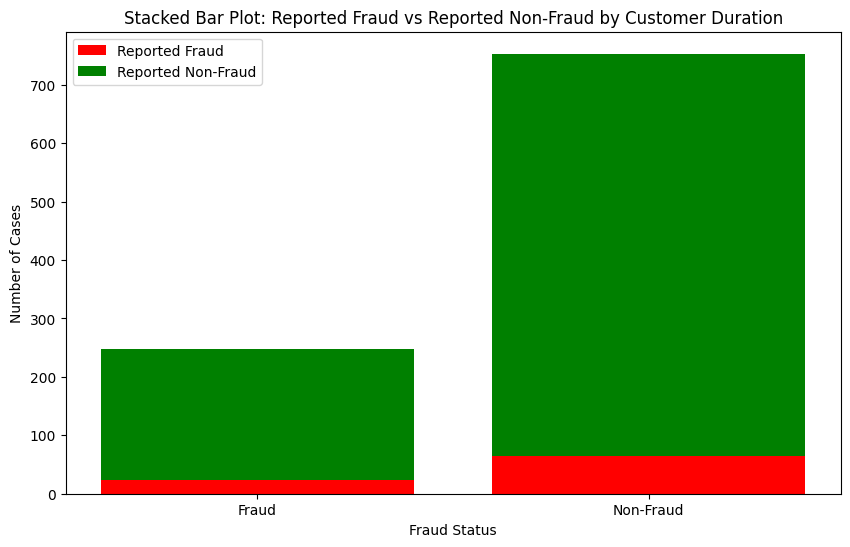

In [56]:
fraud_labels = ['Fraud', 'Non-Fraud']
fraud_count = [
    df[df['fraud_reported'] == 1]['months_as_customer_groups_0-50'].sum(),
    df[df['fraud_reported'] == 0]['months_as_customer_groups_0-50'].sum()
]

non_fraud_count = [
    len(df[df['fraud_reported'] == 1]) - fraud_count[0],
    len(df[df['fraud_reported'] == 0]) - fraud_count[1]
]

# Membuat stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(fraud_labels, fraud_count, label='Reported Fraud', color='red')
plt.bar(fraud_labels, non_fraud_count, bottom=fraud_count, label='Reported Non-Fraud', color='green')
plt.title('Stacked Bar Plot: Reported Fraud vs Reported Non-Fraud by Customer Duration')
plt.xlabel('Fraud Status')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

In [ ]:
occupation_cols = [
    'insured_occupation_adm-clerical', 'insured_occupation_armed-forces',
    'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
    'insured_occupation_farming-fishing', 'insured_occupation_handlers-cleaners',
    'insured_occupation_machine-op-inspct', 'insured_occupation_other-service',
    'insured_occupation_priv-house-serv', 'insured_occupation_prof-specialty',
    'insured_occupation_protective-serv', 'insured_occupation_sales',
    'insured_occupation_tech-support', 'insured_occupation_transport-moving'
]
# Summarize the data
fraud_data = []
for col in occupation_cols:
    fraud_count = df[(df[col] == 1) & (df['fraud_reported'] == 1)].shape[0]
    non_fraud_count = df[(df[col] == 1) & (df['fraud_reported'] == 0)].shape[0]
    fraud_data.append((col, fraud_count, non_fraud_count))

# Create a DataFrame for plotting
fraud_summary_df = pd.DataFrame(fraud_data, columns=['Occupation', 'Fraud', 'Non-Fraud'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
fraud_summary_df.set_index('Occupation').plot(kind='bar', stacked=True, ax=ax, color=['red', 'blue'])
ax.set_title('Fraud vs Non-Fraud Claims by Occupation')
ax.set_xlabel('Occupation')
ax.set_ylabel('Number of Claims')
plt.xticks(rotation=45, ha='right')
plt.legend(['Fraud', 'Non-Fraud'])
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
from sklearn.metrics import classification_report

# 1. Persiapan Data
# Misalkan df adalah DataFrame Anda setelah memuat data

# 2. Eksploitasi Data
# Lakukan eksplorasi data jika diperlukan

# 3. Pemisahan Data
X = df.drop(columns=['fraud_reported'])  # Fitur
y = df['fraud_reported']  # Label

# 4. Pemisahan Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# 5. Pemilihan Model
model=LogisticRegression(max_iter=3000)
model.fit(X_train,y_train)

# 7. Evaluasi Model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 8. Penyetelan Hyperparameter (Opsional)
# Lakukan jika diperlukan

# 9. Prediksi
# Lakukan prediksi jika diperlukan

# 10. Visualisasi Hasil (Opsional)
# Lakukan visualisasi hasil jika diperlukan
